# Guided Projects Artificial Intelligence & Machine Learning
## Guided Projects: Supervised Learning
### Handwritten Digit Recognition
Digit recognition system is the working of a machine to train itself for recognizing the digits 
from different sources like emails, bank cheque, papers, images, etc. and in different realworld scenarios for online handwriting recognition on computer tablets or system. 
Developing such a system includes a machine to understand and classify the images of 
handwritten digits as 10 digits (0–9). Handwritten digits from the MNIST database has 
been one of the most famous databases among the machine learning community for many 
recent decades.
### Question:
Use MNIST dataset to create a classifier for all the 10 digits. First implement the classifier by 
squeezing the image into a vector and then using a MLP. Now, try the same task using a 
different machine learning classifier such as an SVM to check the gain in performance by 
using perceptrons as compared to conventional machine learning techniques.

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import Dense, Flatten, Softmax
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [13]:
# Load the dataset
mnist = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist

In [14]:
HEIGHT, WIDTH = x_train[0].shape
NCLASSES = tf.size(tf.unique(y_train).y)
print("Image height x width is", HEIGHT, "x", WIDTH)
tf.print("There are", NCLASSES, "classes")

Image height x width is 28 x 28
There are 10 classes


The label for image number 12 is 9


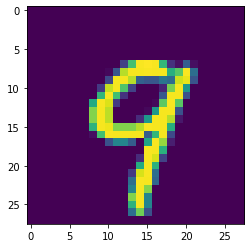

In [15]:
IMGNO = 12
# Uncomment to see raw numerical values.
# print(x_test[IMGNO])
plt.imshow(x_test[IMGNO].reshape(HEIGHT, WIDTH));
print("The label for image number", IMGNO, "is", y_test[IMGNO])

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [17]:
x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)

In [18]:
model = MLPClassifier(hidden_layer_sizes = (512, 256, 128 ), batch_size = 128, verbose = True, early_stopping = True)
model.fit(x_train, y_train)

Iteration 1, loss = 1.35578617
Validation score: 0.916000
Iteration 2, loss = 0.25114493
Validation score: 0.939167
Iteration 3, loss = 0.13670175
Validation score: 0.955333
Iteration 4, loss = 0.10572811
Validation score: 0.956167
Iteration 5, loss = 0.09063741
Validation score: 0.957500
Iteration 6, loss = 0.08551972
Validation score: 0.957833
Iteration 7, loss = 0.09162654
Validation score: 0.961167
Iteration 8, loss = 0.08187283
Validation score: 0.964667
Iteration 9, loss = 0.07677432
Validation score: 0.963833
Iteration 10, loss = 0.06889545
Validation score: 0.959333
Iteration 11, loss = 0.06806410
Validation score: 0.966500
Iteration 12, loss = 0.07094451
Validation score: 0.964333
Iteration 13, loss = 0.05726011
Validation score: 0.968500
Iteration 14, loss = 0.05392374
Validation score: 0.964667
Iteration 15, loss = 0.05469960
Validation score: 0.968667
Iteration 16, loss = 0.04706233
Validation score: 0.971667
Iteration 17, loss = 0.03975372
Validation score: 0.971500
Iterat

MLPClassifier(batch_size=128, early_stopping=True,
              hidden_layer_sizes=(512, 256, 128), verbose=True)

In [20]:
y_pred = model.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       993
           1       0.99      0.98      0.99      1150
           2       0.97      0.98      0.97      1027
           3       0.98      0.97      0.98      1014
           4       0.97      0.98      0.97       969
           5       0.97      0.98      0.98       881
           6       0.99      0.99      0.99       958
           7       0.96      0.98      0.97      1007
           8       0.98      0.98      0.98       975
           9       0.97      0.96      0.97      1026

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Classification using SVM

In [21]:
from sklearn import svm

In [22]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(x_train, y_train)

SVC(decision_function_shape='ovo')

In [33]:
y_pred_svm = clf.predict(x_test)
print(classification_report(y_pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       993
           1       0.99      0.99      0.99      1139
           2       0.97      0.98      0.98      1031
           3       0.99      0.97      0.98      1021
           4       0.98      0.98      0.98       978
           5       0.98      0.99      0.98       883
           6       0.99      0.99      0.99       958
           7       0.97      0.98      0.97      1021
           8       0.98      0.97      0.97       978
           9       0.96      0.97      0.97       998

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

